In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [9]:
df_train = pd.read_csv("./data/train.csv")
df_test = pd.read_csv("./data/test.csv")

In [10]:
df_train.head()

,id,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,song_popularity
0,0,212990.0,0.642286,0.856520,0.707073,0.002001,10.0,NaN,-5.619088,0,0.082570,158.386236,4,0.734642,0
1,1,NaN,0.054866,0.733289,0.835545,0.000996,8.0,0.436428,-5.236965,1,0.127358,102.752988,3,0.711531,1
2,2,193213.0,NaN,0.188387,0.783524,-0.002694,5.0,0.170499,-4.951759,0,0.052282,178.685791,3,0.425536,0
3,3,249893.0,0.488660,0.585234,0.552685,0.000608,0.0,0.094805,-7.893694,0,0.035618,128.715630,3,0.453597,0
4,4,165969.0,0.493017,NaN,0.740982,0.002033,10.0,0.094891,-2.684095,0,0.050746,121.928157,4,0.741311,0


In [11]:
df_train.time_signature.value_counts()

3    23358
4    15919
2      530
5      193
Name: time_signature, dtype: int64

In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                40000 non-null  int64  
 1   song_duration_ms  35899 non-null  float64
 2   acousticness      36008 non-null  float64
 3   danceability      35974 non-null  float64
 4   energy            36025 non-null  float64
 5   instrumentalness  36015 non-null  float64
 6   key               35935 non-null  float64
 7   liveness          35914 non-null  float64
 8   loudness          36043 non-null  float64
 9   audio_mode        40000 non-null  int64  
 10  speechiness       40000 non-null  float64
 11  tempo             40000 non-null  float64
 12  time_signature    40000 non-null  int64  
 13  audio_valence     40000 non-null  float64
 14  song_popularity   40000 non-null  int64  
dtypes: float64(11), int64(4)
memory usage: 4.6 MB


In [13]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                10000 non-null  int64  
 1   song_duration_ms  9043 non-null   float64
 2   acousticness      9050 non-null   float64
 3   danceability      9024 non-null   float64
 4   energy            8945 non-null   float64
 5   instrumentalness  9000 non-null   float64
 6   key               9008 non-null   float64
 7   liveness          8994 non-null   float64
 8   loudness          8974 non-null   float64
 9   audio_mode        10000 non-null  int64  
 10  speechiness       10000 non-null  float64
 11  tempo             10000 non-null  float64
 12  time_signature    10000 non-null  int64  
 13  audio_valence     10000 non-null  float64
dtypes: float64(11), int64(3)
memory usage: 1.1 MB


In [14]:
train_col_null_counts = []
for col_name in df_train.columns.values:
    train_col_null_counts.append(df_train[col_name].isnull().sum())
print(train_col_null_counts)    

[0, 4101, 3992, 4026, 3975, 3985, 4065, 4086, 3957, 0, 0, 0, 0, 0, 0]


In [15]:
test_col_null_counts = []
for col_name in df_test.columns.values:
    test_col_null_counts.append(df_test[col_name].isnull().sum())
print(test_col_null_counts)  

[0, 957, 950, 976, 1055, 1000, 992, 1006, 1026, 0, 0, 0, 0, 0]


In [16]:
def plot_col_nulls(col_null_counts, col_names, ylabel, title):    
    fig, ax = plt.subplots(figsize=(14, 6))
    sns.set_theme(style="whitegrid")
    bars = ax.bar(col_names, col_null_counts)
    ax.set_title(title)
    ax.set_xlabel("column names")
    ax.set_ylabel(ylabel)
    plt.xticks(rotation=90)
    # add the y value on top of each bar
    for bar in bars:
        y_val = bar.get_height()
        plt.text(bar.get_x(), y_val+0.05, y_val)    
    ax = sns.barplot(y=col_null_counts, x=col_names, ax=ax)    

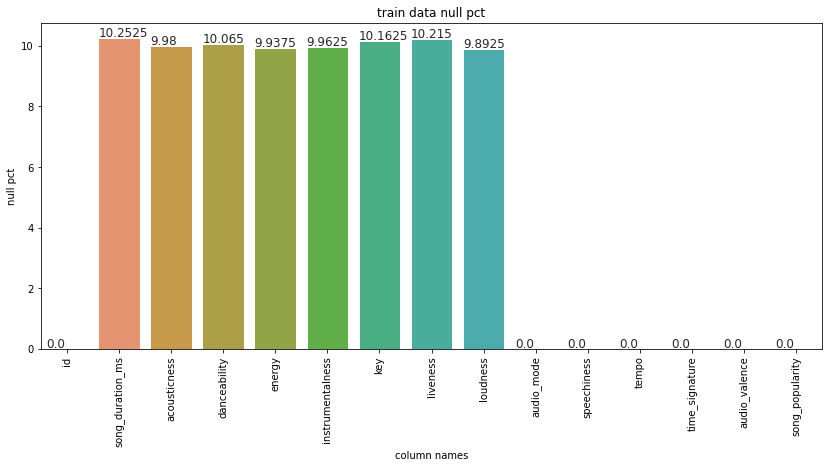

In [17]:
train_col_null_ratio = [round((item/len(df_train))*100, 4) for item in train_col_null_counts]
plot_col_nulls(train_col_null_ratio, df_train.columns.values.tolist(), "null pct", "train data null pct")

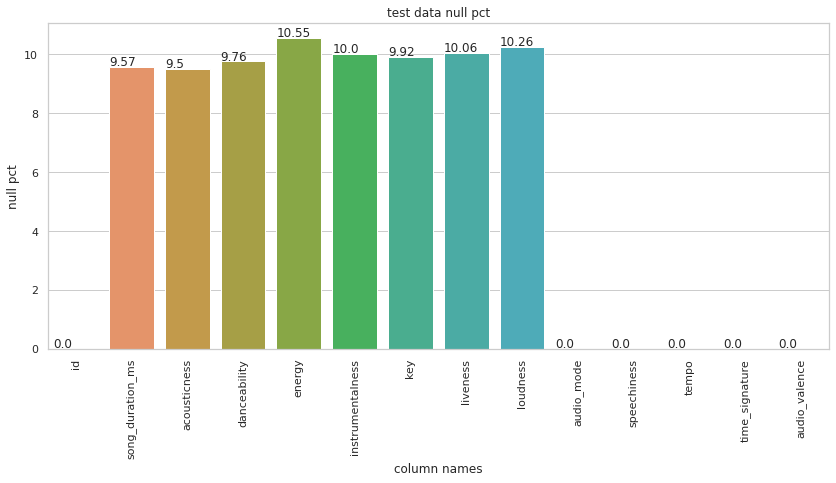

In [18]:
test_col_null_ratio = [round((item/len(df_test))*100, 4) for item in test_col_null_counts]
plot_col_nulls(test_col_null_ratio, df_test.columns.values.tolist(), "null pct", "test data null pct")

### Continuous features distribution on train and test set

In [26]:
import math

categorical_cols = ["audio_mode", "time_signature", "key"]
cont_col_names = [item for item in df_test.columns.values.tolist() if item not in categorical_cols]
cont_col_names.remove("id")
n_rows = math.ceil(len(cont_col_names) / 2)
n_cols = 2

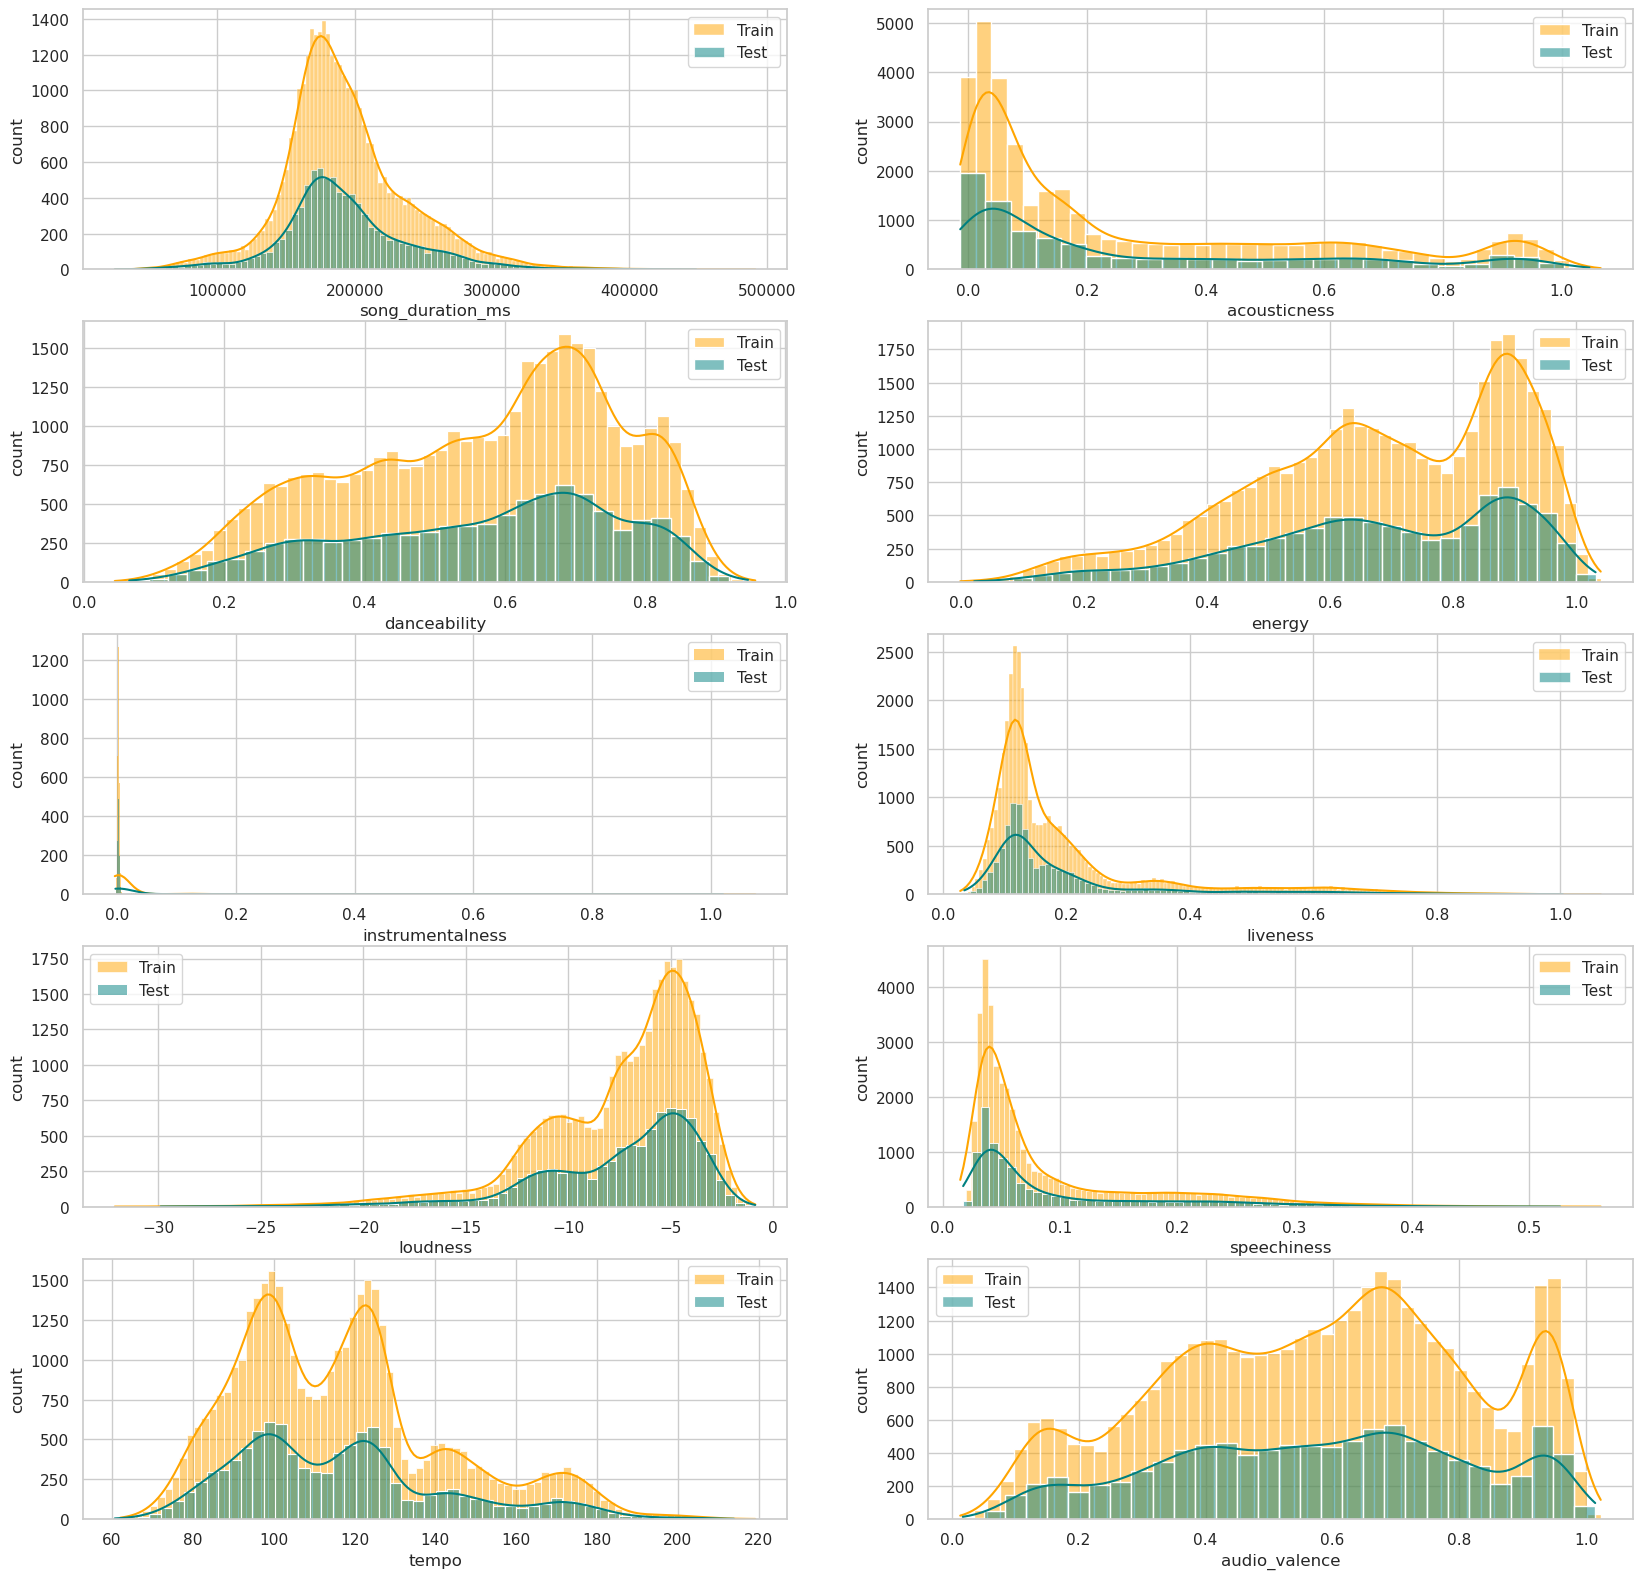

In [31]:
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20,20), dpi=100)
for row in range(n_rows):
    for col in range(n_cols):
        index = (row * n_cols) + col
        col_name = cont_col_names[index]
        sns.histplot(x=df_train[col_name], label="Train", kde=True, fill=True, color="orange", ax=axes[row, col])
        sns.histplot(x=df_test[col_name], label="Test", kde=True, fill=True, color="teal", ax=axes[row, col])
        axes[row, col].legend()
        axes[row, col].set_ylabel("count")
        axes[row, col].set_xlabel(col_name)
plt.show()        

### Continuous features distribution based on target value

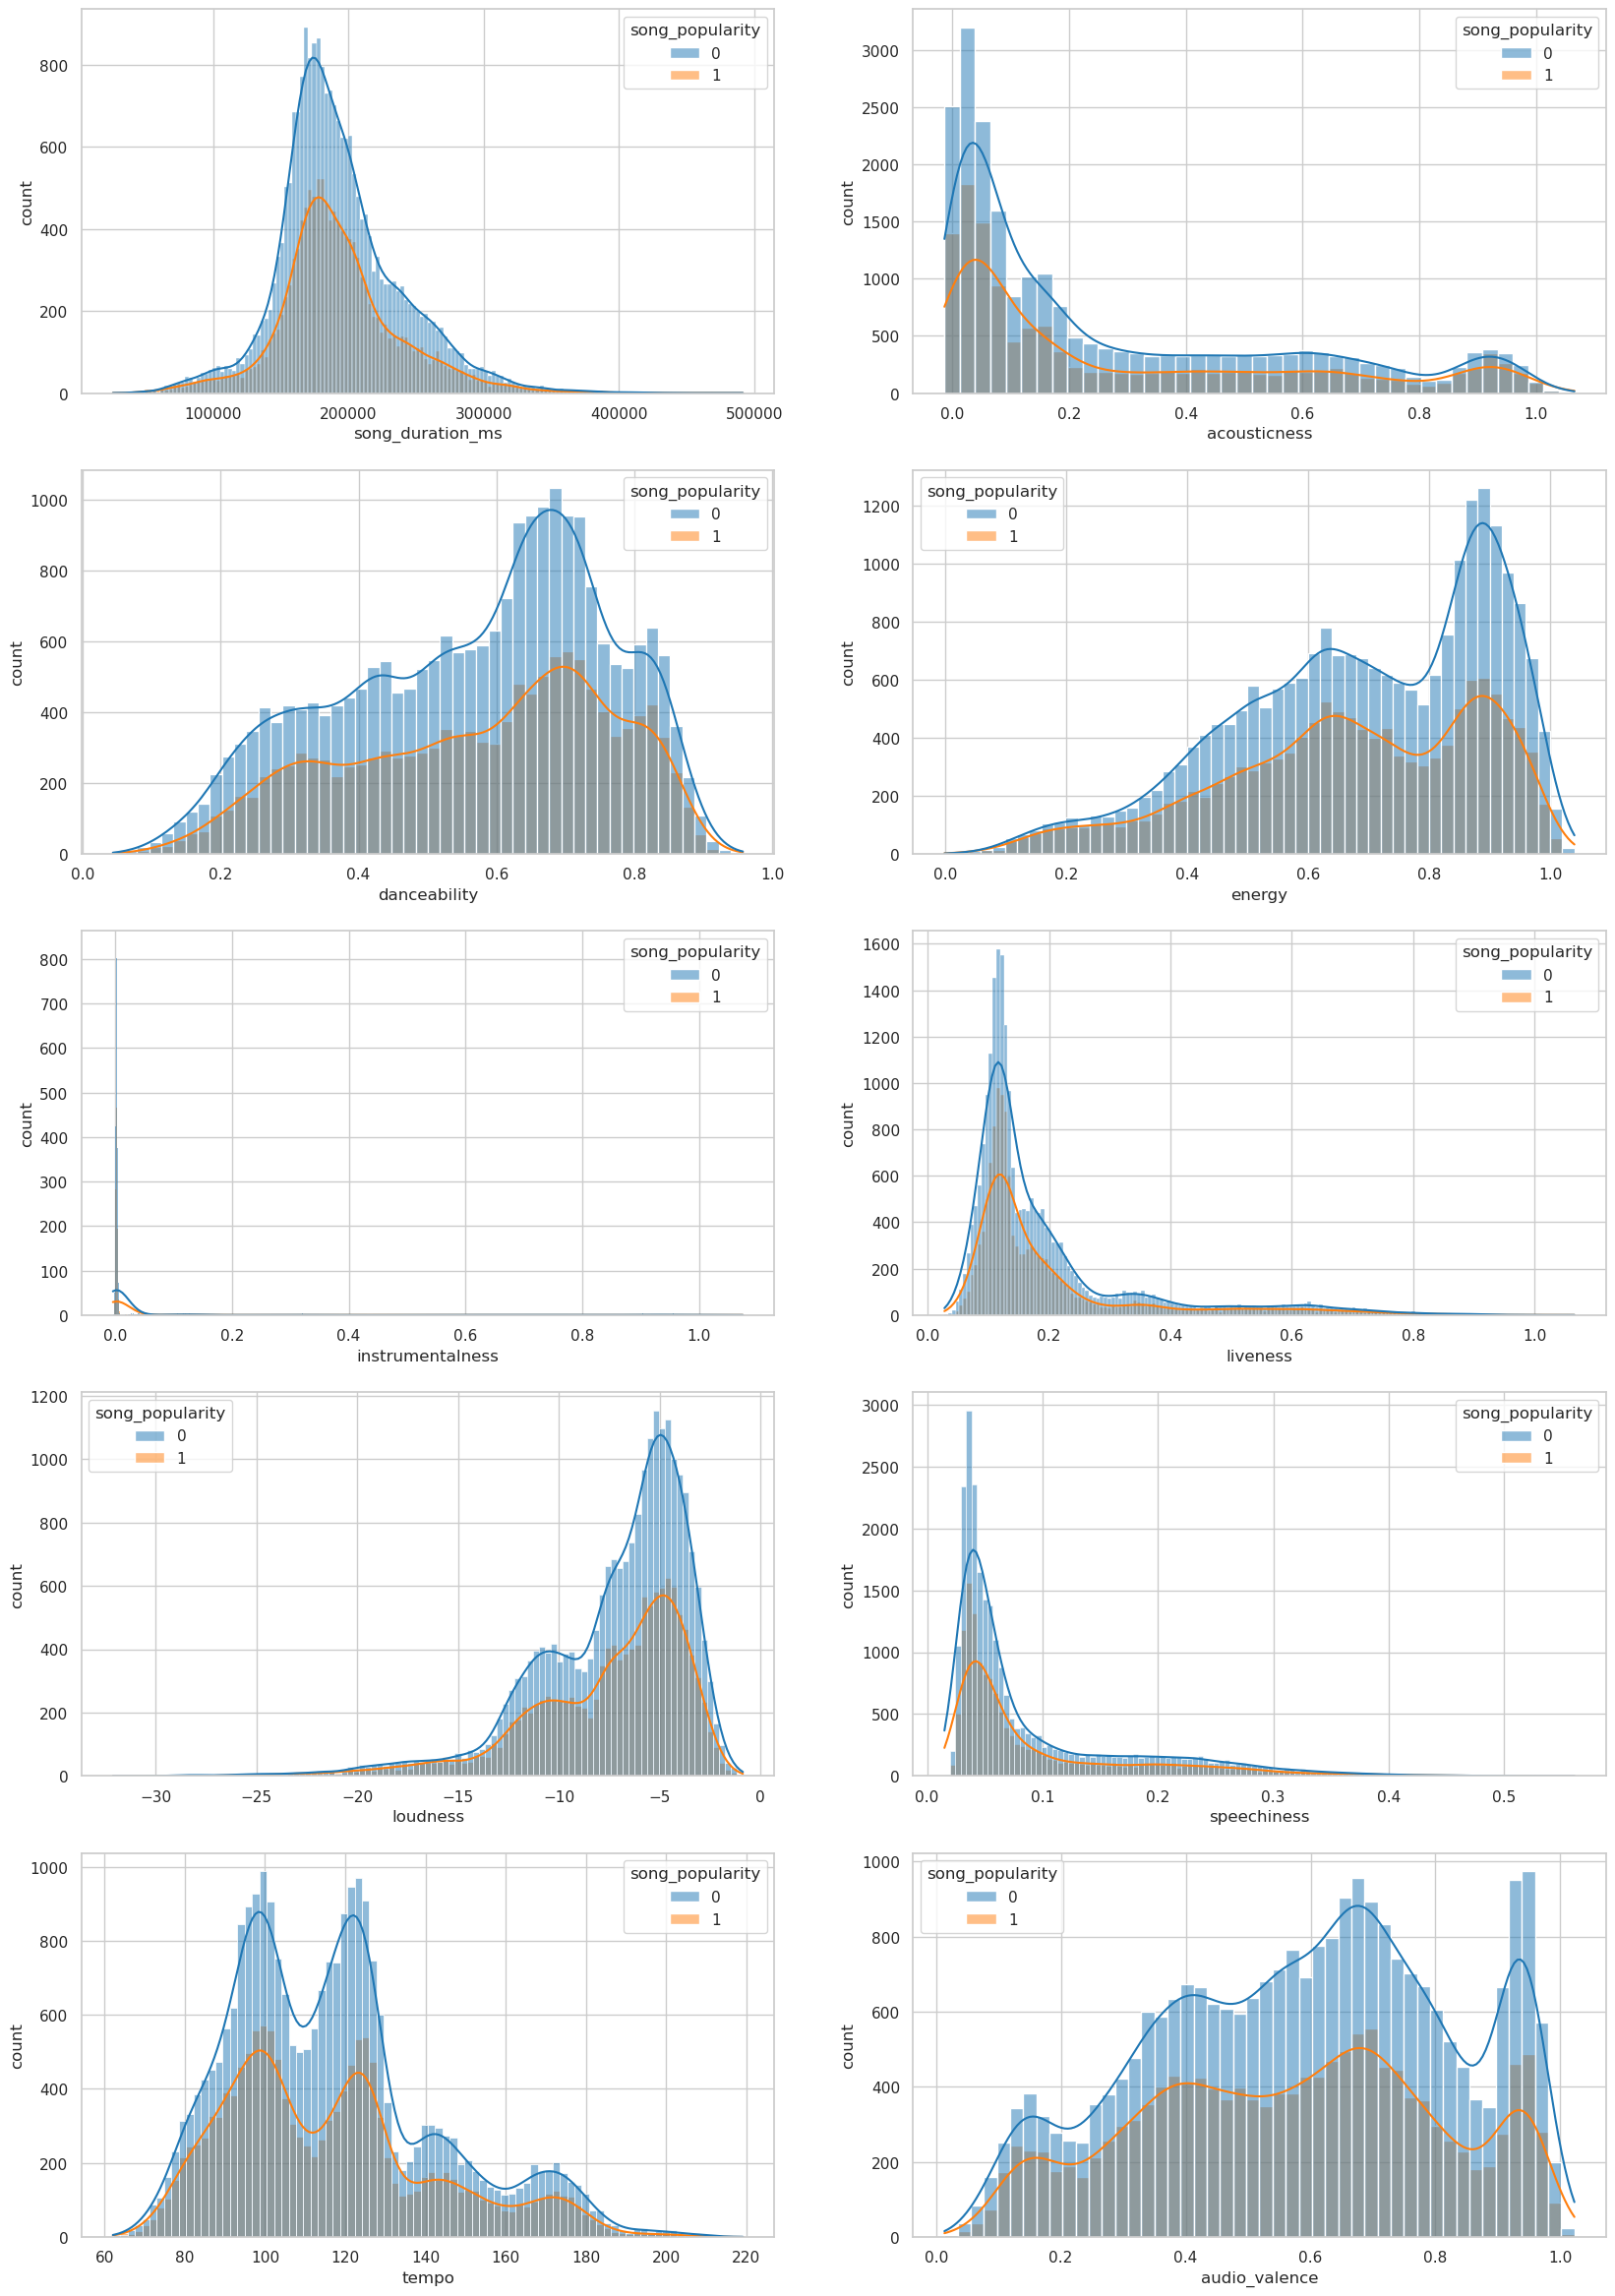

In [42]:
# positive samples
# df_train_pos = df_train[df_train.song_popularity == 1]
# negative samples
# df_train_neg = df_train[df_train.song_popularity == 0]
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20,30), dpi=100)
for row in range(n_rows):
    for col in range(n_cols):
        index = (row * n_cols) + col
        col_name = cont_col_names[index]
        sns.histplot(data=df_train, x=col_name, hue="song_popularity", kde=True, palette="tab10", ax=axes[row, col])
        #sns.histplot(x=df_train_pos[col_name], label="Positive", kde=True, fill=True, color="red", ax=axes[row, col])
        #sns.histplot(x=df_train_neg[col_name], label="Negative", kde=True, fill=True, color="deepskyblue", ax=axes[row, col])
        #axes[row, col].legend()
        axes[row, col].set_ylabel("count")
        axes[row, col].set_xlabel(col_name)
plt.show()  